In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-21 09:38:32.947088: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 09:38:32.985454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 09:38:33.535567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_rosa_art', 'Cam_barba_ruca_art']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_rosa_art']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']
  
dados = dados[['Ano','Cam_rosa_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_rosa_art'] = dados.loc[i,'Cam_rosa_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_rosa_art'].values
dados.head()

,Ano,Cam_rosa_art,Soma,Prop_Cam_rosa_art
0,1980,38.0,576.0,0.065972
1,1981,35.0,320.0,0.109375
2,1982,89.0,104.0,0.855769
3,1983,806.0,2880.0,0.279861
4,1984,525.0,2962.0,0.177245


In [7]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [14]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop art 1950-1988/.weights.h5', overwrite=True)

Epoch 1/500


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0096
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9794 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9510 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9156 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8821 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8673 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8183 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7967 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7793 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7920 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7720 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7776 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7867 
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7624 
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7770 
Epoch 16/500
2/2 ━━━━━━━━━━━━━━━

In [15]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/pesos prop art 1950-1988/.weights.h5')

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7a0e744cc310> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.11376289]
 [0.11821127]
 [0.12265971]
 [0.12710819]
 [0.13155681]
 [0.13600683]
 [0.14045998

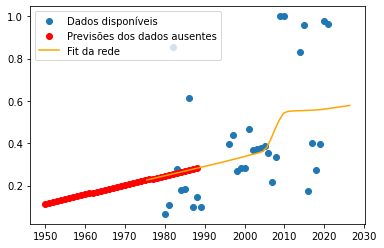

In [16]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

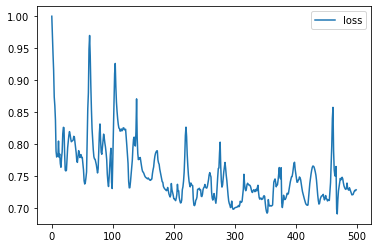

In [17]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [18]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

#Trazendo valores previstos para Camarao_art(sem sete barbas e branco)
df_prev_Camarao_art = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/Cam_art_sem_sb_br.xlsx')

for i in range(len(df_prev_Camarao_art['Ano'])):
       df.loc[i,'Camarao_art'] = df_prev_Camarao_art.loc[i,'Camarao_art']


df_preenchido = df[['Ano','Cam_rosa_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
      df_preenchido.loc[i,'Cam_rosa_art']=df_preenchido.loc[i,'Cam_rosa_art']+df.loc[i,'Camarao_art']*prev_continua[i]
      df_preenchido.loc[i,'Valor acrescido']=df.loc[i,'Camarao_art']*prev_continua[i]
      
df_preenchido = df_preenchido.loc[:1988-1950,:]
with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


#Planilha com os dados preenchidos
df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Previsão Camarao_rosa_art_1950-1988.xlsx')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
     Ano  Cam_rosa_art  Valor acrescido
0   1950      0.000000         0.000000
1   1951      0.000000         0.000000
2   1952      0.000000         0.000000
3   1953      0.000000         0.000000
4   1954      0.000000         0.000000
5   1955      0.000000         0.000000
6   1956      0.000000         0.000000
7   1957      0.000000         0.000000
8   1958      0.000000         0.000000
9   1959      0.000000         0.000000
10  1960      0.000000         0.000000
11  1961      0.000000         0.000000
12  1962      0.000000         0.000000
13  1963      0.000000         0.000000
14  1964      0.000000         0.000000
15  1965      0.000000         0.000000
16  1966      0.000000         0.000000
17  1967      0.000000         0.000000
18  1968      0.000000         0.000000
19  1969      0.000000         0.000000
20  1970      0.000000         0.000000
21  1971      0.000000         0.000000
22  1972      0.000000         0.000000
23

In [19]:
#Planilha com Camarao_art decrescido do que ja foi usado de 1950 até 1988 (sete_barbas, branco, rosa)
Cam_art_sem_sb_br_ro_50_88 = df[['Ano','Camarao_art']].replace(np.nan,0)
for i in range(len(prev_continua)):
    Cam_art_sem_sb_br_ro_50_88.loc[i,'Camarao_art']-=Cam_art_sem_sb_br_ro_50_88.loc[i,'Camarao_art']*prev_continua[i]

Cam_art_sem_sb_br_ro_50_88 = Cam_art_sem_sb_br_ro_50_88.iloc[:1989-1950,:]
with pd.option_context('display.max_rows', None,):
  print(Cam_art_sem_sb_br_ro_50_88)

Cam_art_sem_sb_br_ro_50_88.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_rosa/Cam_art_sem_sb_br_ro_50-88.xlsx')

     Ano  Camarao_art
0   1950     0.000000
1   1951     0.000000
2   1952     0.000000
3   1953     0.000000
4   1954     0.000000
5   1955     0.000000
6   1956     0.000000
7   1957     0.000000
8   1958     0.000000
9   1959     0.000000
10  1960     0.000000
11  1961     0.000000
12  1962     0.000000
13  1963     0.000000
14  1964     0.000000
15  1965     0.000000
16  1966     0.000000
17  1967     0.000000
18  1968     0.000000
19  1969     0.000000
20  1970     0.000000
21  1971     0.000000
22  1972     0.000000
23  1973     0.000000
24  1974     0.000000
25  1975    28.932766
26  1976    36.312584
27  1977   163.314636
28  1978  1039.828491
29  1979   176.677811
30  1980   106.815399
31  1981    85.631287
32  1982   129.097870
33  1983   192.492584
34  1984   177.173462
35  1985   371.693787
36  1986   435.165100
37  1987   561.944336
38  1988   462.768799
